In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pockets=pd.read_csv('measurements.csv')

In [4]:
pockets.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False
4,Uniqlo,skinny,women,Skinny Fit,"87% cotton, 9% polyester, 4% spandex",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False


In [5]:
pockets.describe()

,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack
count,80.000000,80.00000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000
mean,80.750000,18.72875,15.65375,6.654375,15.777500,12.81000,15.565000,13.026250,13.521250,11.948750
std,44.551841,4.88724,3.50392,0.960129,1.469864,1.04864,0.922311,0.948783,0.864591,0.889601
min,9.990000,11.50000,9.50000,4.500000,12.000000,11.00000,13.000000,10.500000,11.500000,9.500000
25%,49.950000,14.00000,13.00000,6.000000,14.500000,12.00000,15.000000,12.425000,13.000000,11.500000
50%,73.975000,20.25000,15.00000,6.500000,16.000000,12.60000,15.500000,13.000000,13.500000,12.000000
75%,95.712500,22.50000,17.00000,7.000000,17.000000,13.50000,16.050000,13.700000,14.000000,12.500000
max,249.000000,28.00000,25.00000,9.200000,19.000000,16.00000,17.500000,15.000000,15.500000,14.000000


In [6]:
pockets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
brand               80 non-null object
style               80 non-null object
menWomen            80 non-null object
name                80 non-null object
fabric              80 non-null object
price               80 non-null float64
maxHeightFront      80 non-null float64
minHeightFront      80 non-null float64
rivetHeightFront    80 non-null float64
maxWidthFront       80 non-null float64
minWidthFront       80 non-null float64
maxHeightBack       80 non-null float64
minHeightBack       80 non-null float64
maxWidthBack        80 non-null float64
minWidthBack        80 non-null float64
cutout              80 non-null bool
dtypes: bool(1), float64(10), object(5)
memory usage: 9.5+ KB


In [7]:
#sns.pairplot(pockets)

In [8]:
#dfBrandPrice=pockets.groupby('brand').mean()['price']

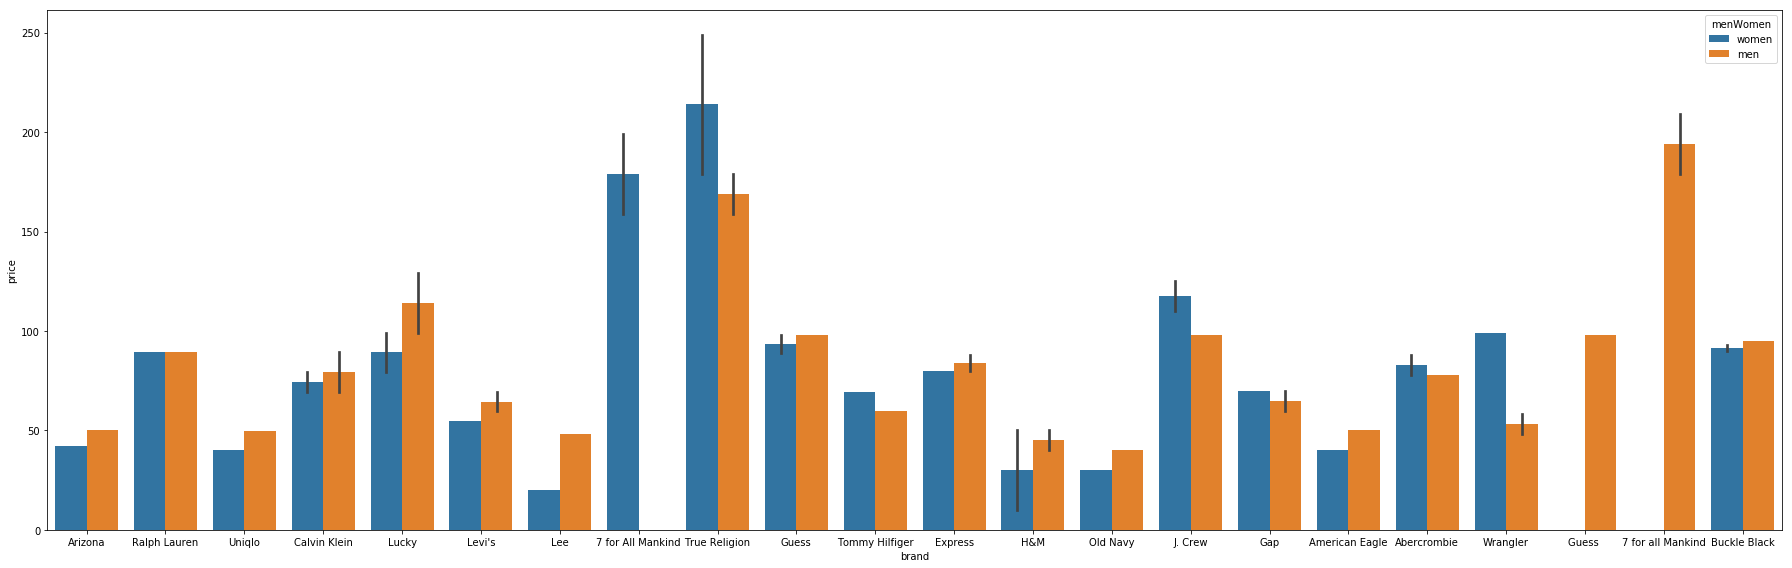

In [9]:
plt.figure(figsize=(25,8))

sns.barplot('brand','price',data=pockets,hue='menWomen')
plt.tight_layout()


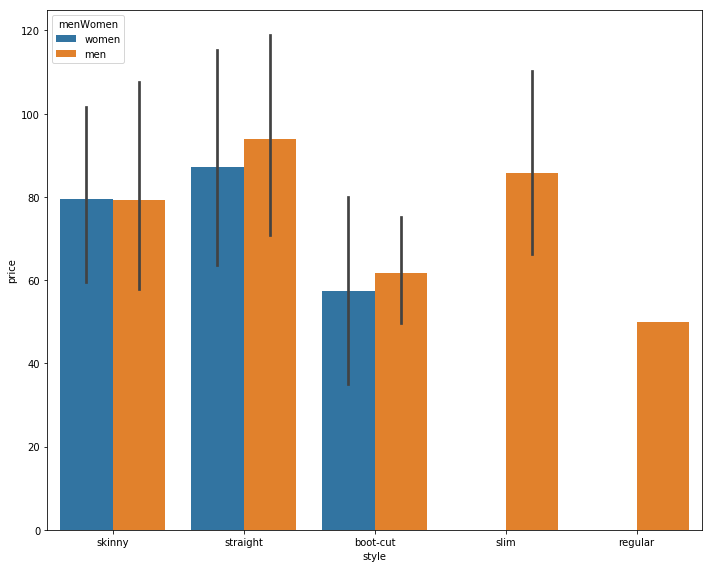

In [10]:
plt.figure(figsize=(10,8))
sns.barplot('style','price',data=pockets,hue='menWomen')
plt.tight_layout()


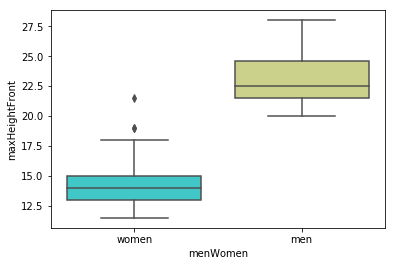

In [11]:
sns.boxplot(x="menWomen", y="maxHeightFront", data=pockets,palette='rainbow')

In [12]:
sizesWomen=pockets[pockets['menWomen']=='women'][['maxHeightFront','minHeightFront','rivetHeightFront',
               'maxWidthFront','minWidthFront','maxHeightBack','minHeightBack',
               'maxWidthBack','minWidthBack']]

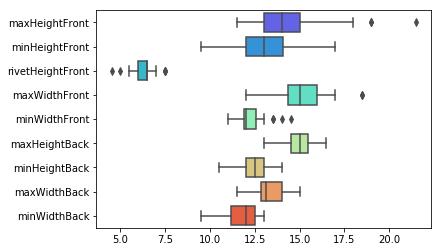

In [13]:
sns.boxplot(data=sizesWomen,palette='rainbow',orient='h')

In [14]:
sizesmen=pockets[pockets['menWomen']=='men'][['maxHeightFront','minHeightFront','rivetHeightFront',
               'maxWidthFront','minWidthFront','maxHeightBack','minHeightBack',
               'maxWidthBack','minWidthBack']]

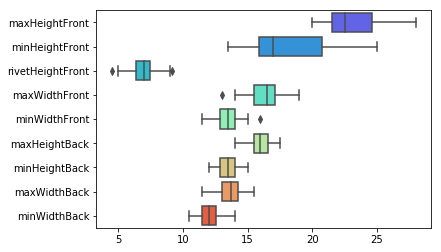

In [15]:
sns.boxplot(data=sizesmen,palette='rainbow',orient='h')

In [16]:
gMean=pockets.groupby('menWomen').mean()
gMean=gMean.drop(['price','cutout'],axis=1)

In [17]:
rowMen=gMean.iloc[0]
rowWomen=gMean.iloc[1]
rowMen

maxHeightFront      23.13000
minHeightFront      18.08000
rivetHeightFront     7.05625
maxWidthFront       16.37000
minWidthFront       13.36250
maxHeightBack       16.00750
minHeightBack       13.47000
maxWidthBack        13.70250
minWidthBack        12.16000
Name: men, dtype: float64

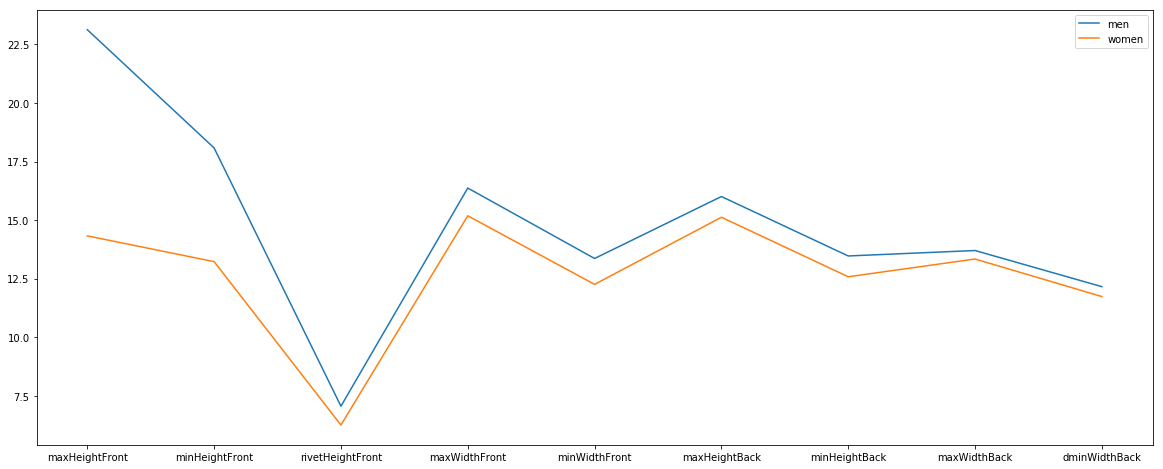

In [18]:
plt.figure(figsize=(20,8))

rowMen.plot()
rowWomen.plot()
plt.xticks(np.arange(9), ('maxHeightFront', 'minHeightFront', 'rivetHeightFront', 'maxWidthFront',
                          'minWidthFront','maxHeightBack','minHeightBack','maxWidthBack','dminWidthBack'))
plt.legend()

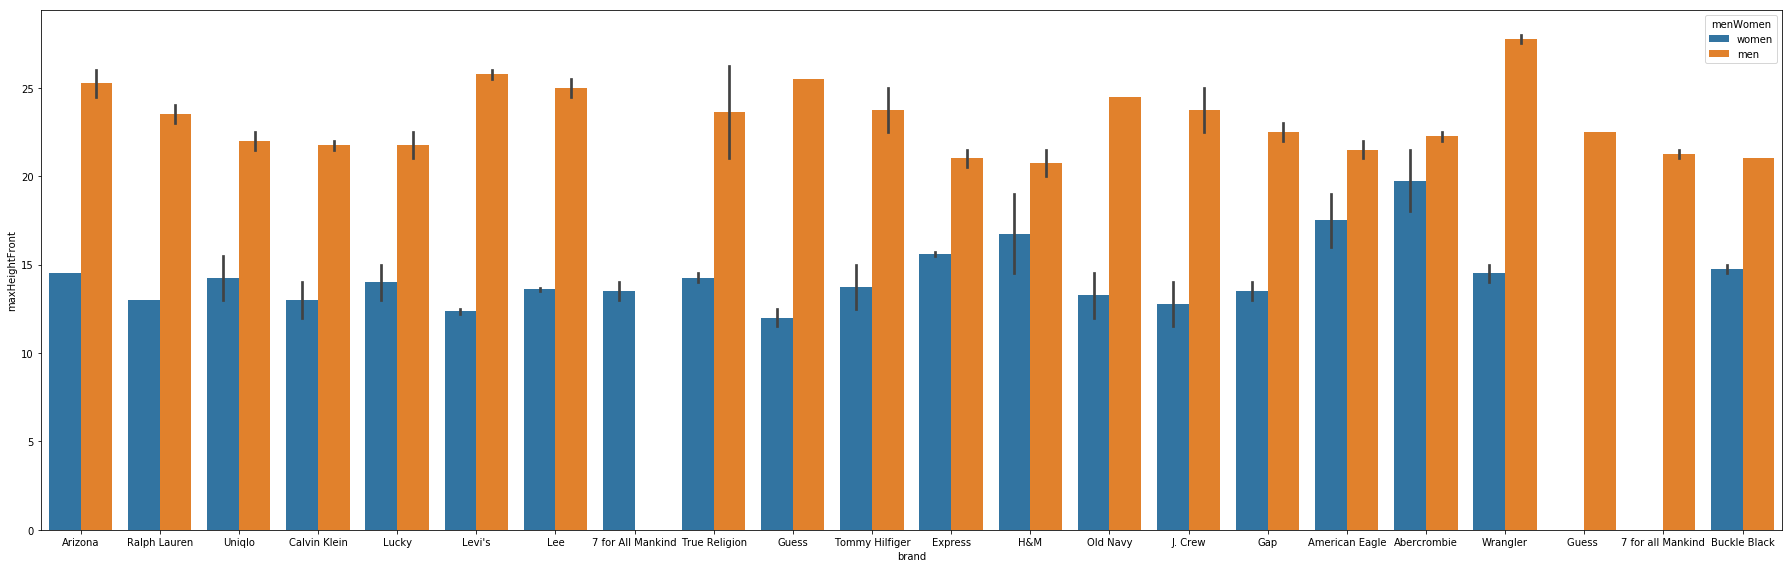

In [24]:
plt.figure(figsize=(25,8))

sns.barplot('brand','maxHeightFront',data=pockets,hue='menWomen')
plt.tight_layout()


In [51]:
women=pd.get_dummies(pockets['menWomen'],drop_first=True)


In [52]:
Style=pd.get_dummies(pockets['style'],drop_first=True)


In [54]:
pockets.drop(['menWomen','style','brand','name','fabric','cutout'],axis=1,inplace=True)

In [57]:
pockets = pd.concat([pockets,women,Style],axis=1)

In [58]:
pockets.head()

,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,women,regular,skinny,slim,straight
0,42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,1,0,1,0,0
1,42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,1,0,0,0,1
2,89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,1,0,1,0,0
3,89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,1,0,0,0,1
4,39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,1,0,1,0,0


In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(pockets.drop('women',axis=1), 
                                                    pockets['women'], test_size=0.30, 
                                                    random_state=101)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
predictions = logmodel.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90         9
          1       1.00      0.87      0.93        15

avg / total       0.93      0.92      0.92        24

